# The Lending Club Loan Data Analysis

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Apr 28 23:20:32 2022

@author: XINYUEWU
"""

# •	Describe the dataset and any issues with it.
# •	Generate a minimum of 5 unique visualizations using the data and write a brief description of your observations. Additionally, all attempts should be made to make the visualizations visually appealing
# •	Create a feature set and create a model which predicts interest_rate using at least 2 algorithms. Describe any data cleansing that must be performed and analysis when examining the data.
# •	Visualize the test results and propose enhancements to the model, what would you do if you had more time. Also describe assumptions you made and your approach.

# In[]
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
import numpy as np


## Data Description

First, check the data and filter the variables. From the data description, I can get the basic information of each columns.

In [2]:
# In[]
#•	Describe the dataset and any issues with it.
data = pd.read_csv('/Users/XINYUEWU/Desktop/loans_full_schema.csv')

data.describe()

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,9183.000000,1.000000e+04,9976.000000,1.495000e+03,1495.000000,10000.00000,4342.000000,10000.00000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.930306,7.922215e+04,19.308192,1.279146e+05,19.979304,0.21600,36.760709,2001.29000,1.95820,22.679600,...,0.123800,16361.922500,43.272000,12.427524,476.205323,14458.916610,2494.234773,1894.448466,599.666781,0.119516
std,3.703734,6.473429e+04,15.004851,7.016838e+04,8.054781,0.68366,21.634939,7.79551,2.38013,11.885439,...,0.337172,10301.956759,11.029877,5.001105,294.851627,9964.561865,3958.230365,3884.407175,517.328062,1.813468
min,0.000000,0.000000e+00,0.000000,1.920000e+04,0.320000,0.00000,1.000000,1963.00000,0.00000,2.000000,...,0.000000,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.500000e+04,11.057500,8.683350e+04,14.160000,0.00000,19.000000,1997.00000,0.00000,14.000000,...,0.000000,8000.000000,36.000000,9.430000,256.040000,6679.065000,928.700000,587.100000,221.757500,0.000000
50%,6.000000,6.500000e+04,17.570000,1.130000e+05,19.720000,0.00000,34.000000,2003.00000,1.00000,21.000000,...,0.000000,14500.000000,36.000000,11.980000,398.420000,12379.495000,1563.300000,984.990000,446.140000,0.000000
75%,10.000000,9.500000e+04,25.002500,1.515455e+05,25.500000,0.00000,53.000000,2006.00000,3.00000,29.000000,...,0.000000,24000.000000,60.000000,15.050000,644.690000,20690.182500,2616.005000,1694.555000,825.420000,0.000000
max,10.000000,2.300000e+06,469.090000,1.100000e+06,39.980000,13.00000,118.000000,2015.00000,29.00000,87.000000,...,3.000000,40000.000000,60.000000,30.940000,1566.590000,40000.000000,41630.443684,40000.000000,4216.440000,52.980000


It is vital to check the missing value first becuase the columns with many missing values will be meaningless. Therefore, find the columns that have more than 50% of the missing values and drop theese columns.  
From the plots below, It's clear that the columns on the right side have more than 50% missing values.

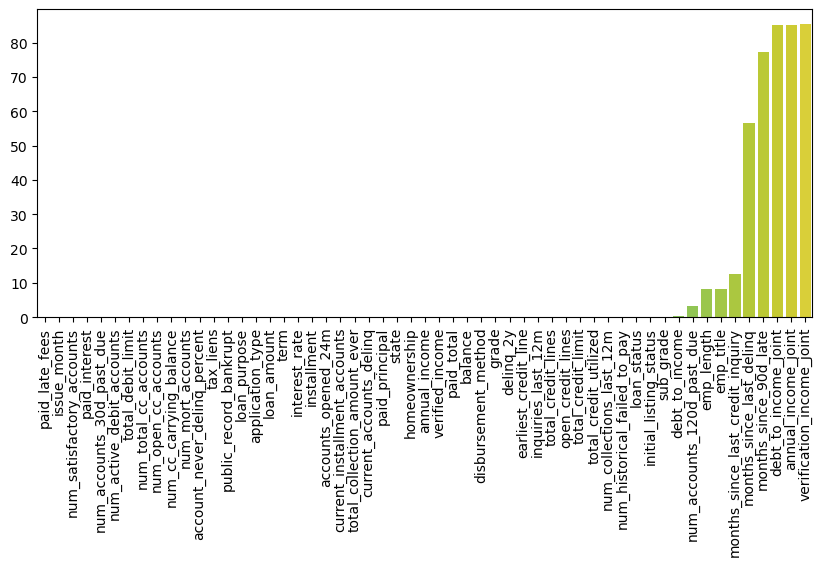

In [3]:
#drop nan columns
#drop the features with 50% or more missing data
plt.figure(figsize=(10,4)) # make image larger and clearer
# y contains the % of missing values od each column and x is the index of the series in above cell
sns.barplot(y=((data.isnull().sum()/len(data))*100).sort_values(), x=((data.isnull().sum()/len(data))*100).sort_values().index, palette='viridis') 
plt.xticks(rotation=90); 
plt.show()

Therefore, we drop the columns that has more than 50% of missing values.

In [4]:
selected_columns =  data.columns[((data.isnull().sum()/len(data))*100 < 50)].to_list()
data = data[selected_columns]

#drop columns
data = data.drop(columns = ['num_accounts_120d_past_due'])

### The correlation of Different Loan Features

The correlation plots show the correlation of different loan features. 

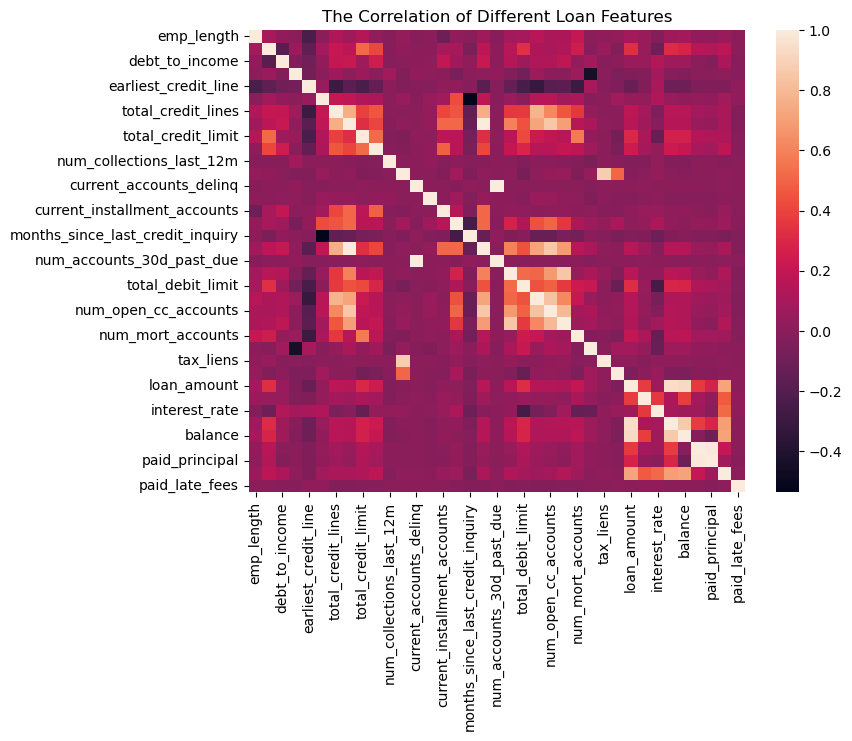

In [5]:
# In[]
# •	Generate a minimum of 5 unique visualizations using the data and write a brief description of your observations. Additionally, all attempts should be made to make the visualizations visually appealing

# correlation
fig = plt.figure(figsize = (8,6))
sns.heatmap(data.corr())
plt.title('The Correlation of Different Loan Features')
plt.show()


### the Distribution of Interest Rate and Loan Amount

Check the distribution of interest rate helps us to learn the interest rate in a more visible aspect.  From the plot, we can see that the interest rate is more distributed on 5% to 15%. Then, check the distribution of loan amount helps us to learn the loan amount in a more visible aspect. From the plot, we can see that the loan amount is more distributed around \$10000.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


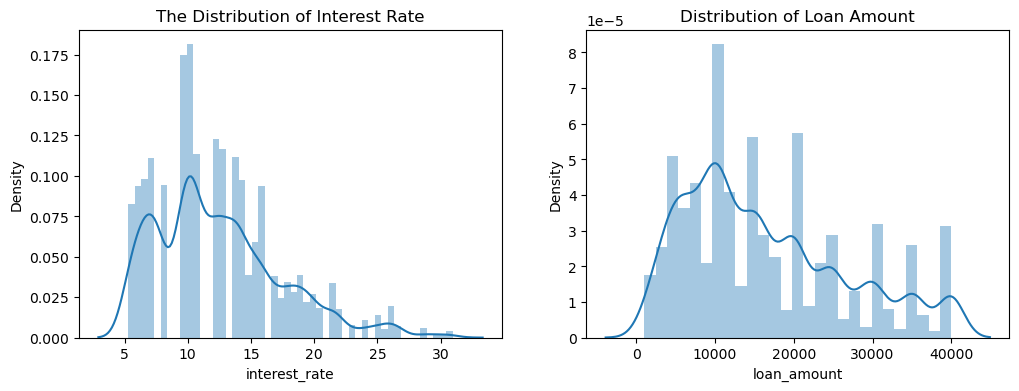

In [6]:
#interest rate distribution
fig,ax = plt.subplots(1,2,figsize = (12,4))
sns.distplot(data["interest_rate"],ax = ax[0])
ax[0].title.set_text('The Distribution of Interest Rate')
#loan amount
sns.distplot(data["loan_amount"],ax = ax[1]) 
ax[1].title.set_text("Distribution of Loan Amount")
plt.show()

### Loaner Background

To get know loaners better, first, I plot the loan purpose of loaners. The main loan purpose of these loaners are debt consolidation, credit care, home improvement and major purchase.  

Then I ploted the top 10 jobs of loaners. The most common jobs are manager, owner, teacher, driver and sales.  

To some extent, the type of home ownership reflect their income and asset. From the plot below, we can see that the loaners mainly have mortgage or rent house, only a small portion of loaners have their own house.

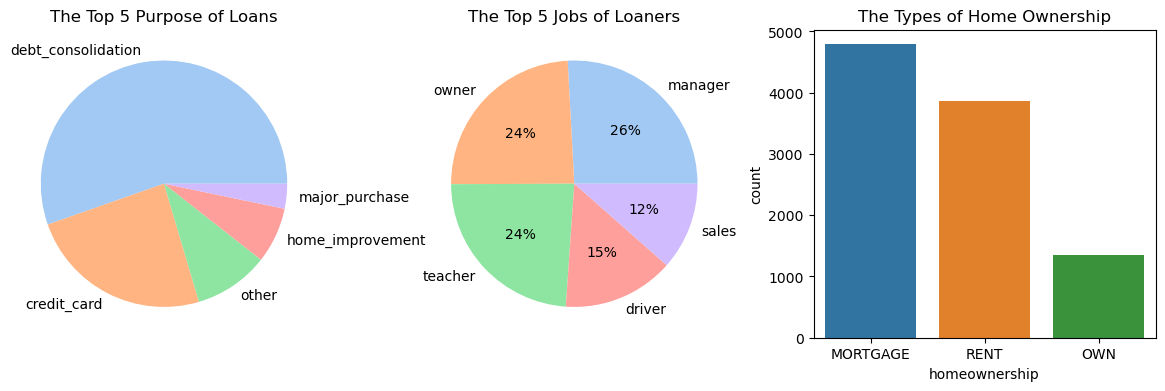

In [7]:
fig,ax = plt.subplots(1,3,figsize = (15,4))
colors = sns.color_palette('pastel')[0:5]

#loan purpose
ax[0].pie(data["loan_purpose"].value_counts()[:5],labels = data["loan_purpose"].value_counts()[:5].index,colors = colors)
ax[0].title.set_text('The Top 5 Purpose of Loans')

#jobs
ax[1].pie(data["emp_title"].value_counts()[:5],labels = data["emp_title"].value_counts()[:5].index,colors = colors, autopct='%.0f%%')
ax[1].title.set_text('The Top 5 Jobs of Loaners')

#home_ownership
sns.countplot(x = 'homeownership', data = data, ax = ax[2])
ax[2].title.set_text('The Types of Home Ownership')

plt.show()

### The relationship between different variables

To analyze the interest rate, the grade can be treated as one determinent. The boxplot shows that when the credit grade become lower, the risk of late payment will increase and thus the interest rate will be higher.  

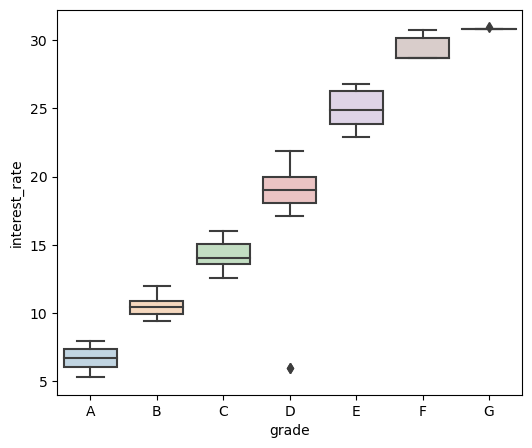

In [8]:
# relationship between interest rate and grade
fig = plt.figure(figsize = (6,5))
ax1 = sns.boxplot(x = 'grade', y= 'interest_rate', data = data,order=["A", "B", "C",'D','E','F','G'])
for patch in ax1.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))

plt.show()

The loan amount also affect the interest rate. When the loan amount increase, the interest rate will also increase.

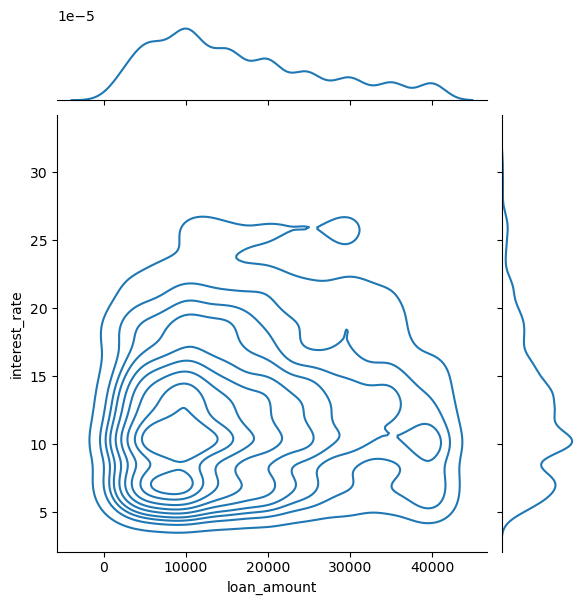

In [9]:
#relationship between loan amount and interest rate
sns.jointplot(x = 'loan_amount', y = 'interest_rate', data = data ,kind = 'kde')
plt.show()

## Data Wrangling and feature selection

After getting know the data,the next step is to do data wrangling and feature selection. First, I have to turn the category data into the numeric data. Second, I choose the independent variables and the dependent variable. Then I used univraite selection algorithm to select the 15 independent variables with the top 15 highest score.     

The Univariate Selection method on feature selection works by choosing the best N features based on the univariate statistical tests. We need to compare features one by one to the target field to see the statistical significance between them. This method is also called analysis of variance (ANOVA).

+ For classification problem (y), use:  
_chi-square test_, f_classif, mutual_info_classif, mutual information  
+ For regression (y continuous), the problem can be used:  
_Pearson correlation coefficient_, f_regression, mutual_info_regression, maximum information coefficient

In [10]:
# In[]
# •	Create a feature set and create a model which predicts interest_rate using at least 2 algorithms. Describe any data cleansing that must be performed and analysis when examining the data.
data = data.fillna(0)
#data wrangling
object_data = data.select_dtypes(include=['object']).astype('category').apply(lambda x: x.cat.codes)
data = data.drop(columns = data.select_dtypes(include=['object']))
data = pd.concat([data,object_data],axis = 1)

#setting X and y
X = data.drop(columns = ['interest_rate'],axis = 1)
y = pd.DataFrame(data['interest_rate'])

#feature selection: Univariate Selection
best_features=SelectKBest(score_func=f_regression,k=15)
fit = best_features.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featurescores = pd.concat([dfcolumns,dfscores],axis=1)
featurescores.columns=['species','score']
print(featurescores.nlargest(15,'score'))

feature_1 = featurescores.nlargest(15,'score')['species']
X_1 = X[feature_1]


                         species          score
43                     sub_grade  698639.668071
42                         grade  155915.092068
34                 paid_interest    3599.504057
29                          term    1476.014882
20             total_debit_limit     690.823844
39               verified_income     627.170407
47           disbursement_method     293.204028
2                 debt_to_income     199.335228
24             num_mort_accounts     195.107251
5             inquiries_last_12m     175.095194
8             total_credit_limit     173.209156
25  account_never_delinq_percent     157.930524
15           accounts_opened_24m     147.701638
45                   loan_status     120.363466
4           earliest_credit_line     108.545651


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## Modeling

For the modeling, I choose two machine learning algorithms: one is SVR and the other is XGboost.  

SVR uses the same basic idea as Support Vector Machine (SVM), a classification algorithm, but applies it to predict real values rather than a class. SVR acknowledges the presence of non-linearity in the data and provides a proficient prediction model. 

With the interest rate variable given, I plan to train a supervised regression model that could do predictive analysis. The ultimate goal is to compare the predicting interest rate with the actual interest rate. Unlike the Linear Regression model whose objective is to minimize the sum of the squared errors, Support Vector Regression (SVR) only defines how much error is tolerable. So SVR has more flexibility. The parameter RBF Kernel makes it feasible to apply SVR to non-linear problems, which proves to be performing better in this project.

XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.  

The XGBoost is also a supervised regression algorithm as well as a boosting algorithm. The XGBoost model can select the feature using random decision trees and reduce the error using gradient descent method. After adjusting and testing the parameters, the best Xgboost model and estimators can be found.

In [11]:
#modeling

def modeling(X, y_variable, model):
  #split dataset
  X_train, X_test, y_train, y_test = train_test_split(X, y_variable, test_size=0.33, random_state=42)

  #Feature Scaling
  sc_X = StandardScaler()
  sc_y = StandardScaler()
  X_train_sc = pd.DataFrame(sc_X.fit_transform(X_train),index = X_train.index)
  X_test_sc = pd.DataFrame(sc_X.fit_transform(X_test),index = X_test.index)
  y_train_sc = pd.DataFrame(sc_y.fit_transform(y_train),index = y_train.index)

  #Training the SVR model on the whole dataset
  regressor = model
  regressor.fit(X_train_sc, y_train_sc)

  #Predicting a new result
  y_pred = regressor.predict(X_test_sc).reshape(-1,1)

  #reverse prediction
  y_pred_ori = pd.DataFrame(sc_y.inverse_transform(y_pred),index = X_test.index)
  y_test = pd.DataFrame(y_test, index = y_test.index)
  
  #return results
  res = pd.concat([y_test,y_pred_ori],axis = 1)
  res.columns = (['true value','predicted value'])

  return res

#method 1: SVR
model_svr = SVR(kernel = 'rbf')
results_svr = modeling(X_1,y,model_svr)

#method 2: Xgboost
other_params = {'learning_rate' : 0.1,
                'n_estimators': 100,
                'max_depth': 2,
                'min_child_weight': 1,
                'subsample': 0.8,
                'colsample_bytree': 0.5,
                'gamma': 0,
                'reg_alpha': 1,
                'reg_lambda': 2
                }
model_xgb = MultiOutputRegressor(
      xgb.XGBRegressor(
          objective = 'reg:squarederror',
          **other_params))
results_xgb = modeling(X_1,y,model_xgb)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## Data Visualization and Prospect

### Evaluation Indicators

The evaluation indcators like MAPE, RMSE reflect the predicted results. The MAPE of SVR and Xgboost are less than 3%, indicating a good performance. The RMSE of SVR and Xgboost are less than 1%, also reflecting the good result.

In [12]:
#mape
def mape(actual, pred, algorithm): 
    actual, pred = np.array(actual), np.array(pred)
    res = np.mean(np.abs((actual - pred) / actual)) * 100
    print('The mean absolute percentage error (MAPE) of {}'.format(algorithm),round(res,2),'%')

mape(results_svr['true value'],results_svr['predicted value'],'SVR')
mape(results_xgb['true value'],results_xgb['predicted value'],'Xgboost')

#rmse
def rmse(actual, pred, algorithm):
    res = np.sqrt(((pred - actual) ** 2).mean())
    print('The root mean squared error (RMSE) of {}'.format(algorithm),round(res,2))

rmse(results_svr['true value'],results_svr['predicted value'],'SVR')
rmse(results_xgb['true value'],results_xgb['predicted value'],'Xgboost')

The mean absolute percentage error (MAPE) of SVR 2.9 %
The mean absolute percentage error (MAPE) of Xgboost 1.89 %
The root mean squared error (RMSE) of SVR 0.63. 
The root mean squared error (RMSE) of Xgboost 0.27. 


### Data Visualization

The distribution of predicted Values and fitted values using two algorithm shows the incrediable results.Both algorithms predict the interest rate accurately. The residual plots also indicates that the SVR and XGboost perform good. The mean of SVR residuals is around 0.5 and the mean of Xgboost residuals is really close to 0.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

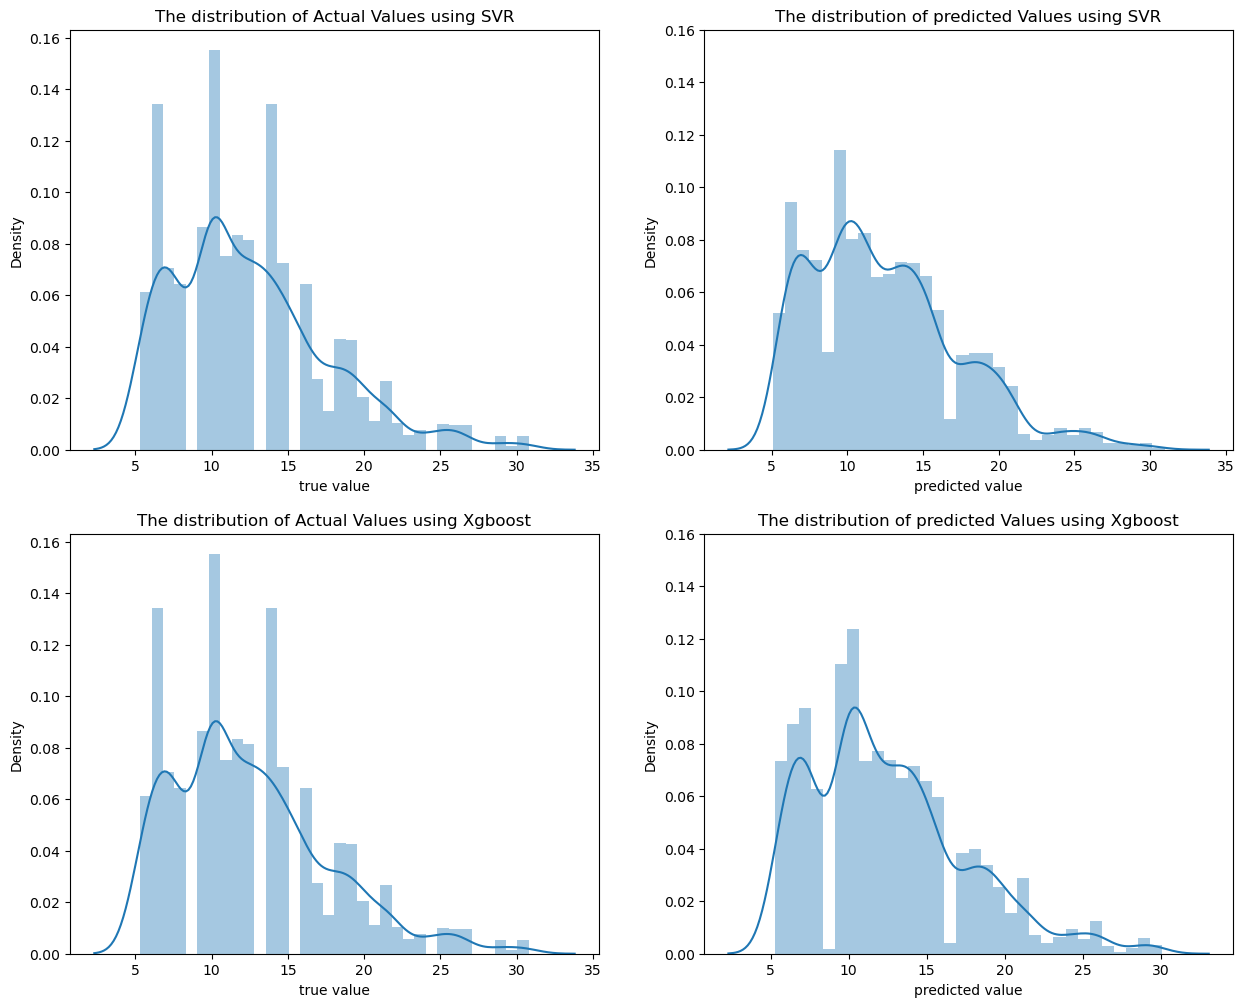

In [13]:
# In[]
# •	Visualize the test results and propose enhancements to the model, what would you do if you had more time. Also describe assumptions you made and your approach.
fig,ax = plt.subplots(2,2,figsize = (15,12))
ax[0,1].set_ylim(0, 0.16)
ax[1,1].set_ylim(0, 0.16)
sns.distplot(results_svr['true value'],ax = ax[0,0])
sns.distplot(results_svr['predicted value'],ax = ax[0,1])
sns.distplot(results_xgb['true value'],ax = ax[1,0])
sns.distplot(results_xgb['predicted value'],ax = ax[1,1])
ax[0,0].set_title('The distribution of Actual Values using SVR')
ax[0,1].set_title('The distribution of predicted Values using SVR')
ax[1,0].set_title('The distribution of Actual Values using Xgboost')
ax[1,1].set_title('The distribution of predicted Values using Xgboost')
plt.show()

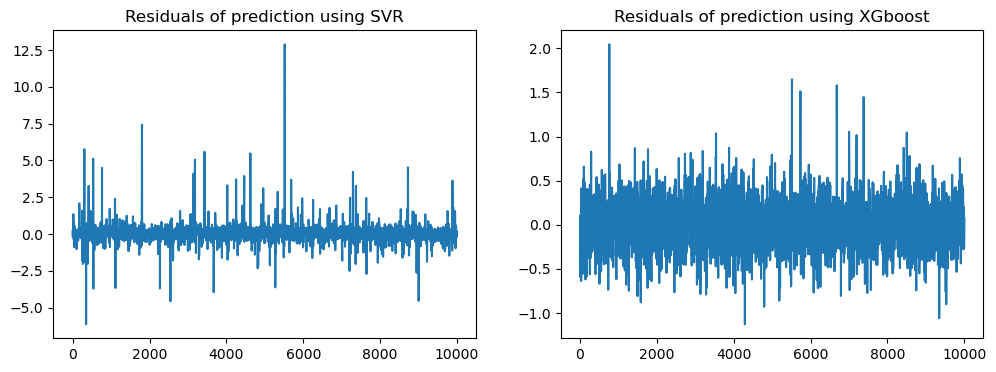

In [14]:
#residuals
fig,ax = plt.subplots(1,2,figsize = (12,4))
ax[0].plot(results_svr.sort_index()['true value']-results_svr.sort_index()['predicted value'])
ax[0].title.set_text('Residuals of prediction using SVR')
ax[1].plot(results_xgb.sort_index()['true value']-results_xgb.sort_index()['predicted value'])
ax[1].title.set_text('Residuals of prediction using XGboost')
plt.show()

### Prospects

1. **Using different algorithms to select features**: Statistical-based feature selection methods involve evaluating the relationship between each input variable and the target variable using statistics and selecting those input variables that have the strongest relationship with the target variable. These methods can be fast and effective, although the choice of statistical measures depends on the data type of both the input and output variables. In this project, first I use univariate selection to select the model, then I build a XGboost model using random decision trees to select features. To improve the model, I'd like to use more feature selection methods, like heatmap, PCA. 
2. **Add L1 or L2 regularization**: A regression model that uses L1 regularization technique is called Lasso Regression and model which uses L2 is called Ridge Regression. The key difference between these techniques is that Lasso shrinks the less important feature’s coefficient to zero thus, removing some feature altogether. So, this works well for feature selection in case we have a huge number of features. In order to balance the bias and error, avoid the overfitting and underfitting, I'd like to add L1 or L2 reguarization to fix the problems.
3. **Add geographic analysis plots**: The geographic analysis on lending data are also interesting. From the geographic analysis, We can directly see the loan amounts, interest rate, or loaner background in different areas.